Importing the Libraries

In [1]:
import tensorflow as tf
import numpy as np
import keras
from keras.models import Sequential
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Conv2D, Dense, Dropout, MaxPooling2D, Flatten
from keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from skimage.transform import resize
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc

Looading The Data

In [2]:
x=np.load("/content/X.npy")
y=np.load("/content/Y.npy")

Data Exploration

In [3]:
print(x)

[[[[226 164 206]
   [224 154 196]
   [225 175 211]
   ...
   [240 221 237]
   [232 184 214]
   [243 213 235]]

  [[217 142 188]
   [221 130 179]
   [224 150 196]
   ...
   [227 170 204]
   [229 180 215]
   [236 212 232]]

  [[237 178 212]
   [229 157 199]
   [218 125 175]
   ...
   [221 184 217]
   [190 153 193]
   [227 164 208]]

  ...

  [[217 145 192]
   [214 129 184]
   [212 129 183]
   ...
   [194 122 185]
   [204 143 193]
   [189 129 188]]

  [[218 144 192]
   [213 128 185]
   [208 121 171]
   ...
   [136  79 145]
   [184 111 174]
   [188 112 176]]

  [[212 125 181]
   [211 136 181]
   [220 162 206]
   ...
   [127  90 152]
   [213 167 202]
   [215 180 211]]]


 [[[219 150 197]
   [217 158 201]
   [228 173 205]
   ...
   [198 165 199]
   [230 204 224]
   [231 193 221]]

  [[223 150 195]
   [222 140 192]
   [213 133 186]
   ...
   [218 143 193]
   [218 148 197]
   [215 131 185]]

  [[203 125 176]
   [218 143 192]
   [227 163 199]
   ...
   [210 137 188]
   [203 121 177]
   [192 124

In [4]:
print(y)

[0 0 0 ... 1 1 1]


In [5]:
# Printing Shape of X and Y
print(x.shape)
print(y.shape)

(5547, 50, 50, 3)
(5547,)


In [6]:
# Counting the Number of Images for both Classes i.e., 0 and 1
print('No of Negative Images:', len(x[y==0])) # images with label 0 = Non-IDC, Negative Images
print('No of Positive Images:', len(x[y==1])) # images with label 1 = IDC, Positive Images

No of Negative Images: 2759
No of Positive Images: 2788


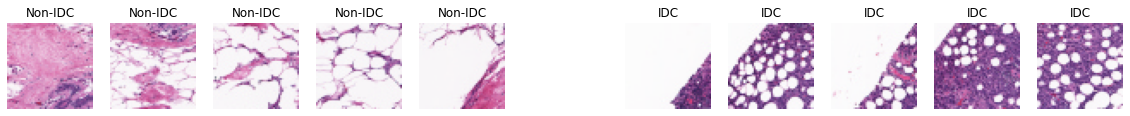

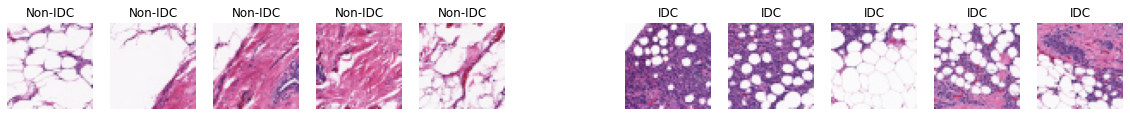

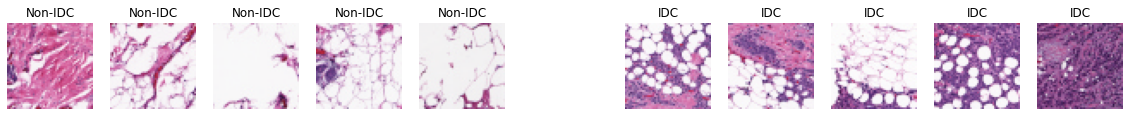

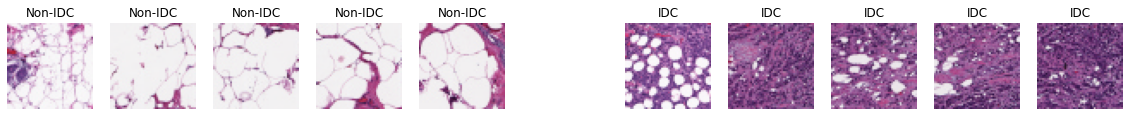

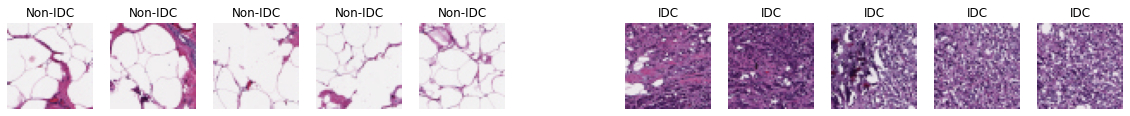

In [7]:
# Looking at some images

img0 = x[y==0] # Non-IDC, negative image
img1 = x[y==1] # IDC, positive image

batch = 0 # Each batch plot 25 Non-IDC images on the left and 25 IDC images on the right

for row in range(5):
    plt.figure(figsize=(20,10))
    for col in range(5):
        plt.subplot(1,11,col+1)
        plt.imshow(img0[9*batch + 3*row+col])
        plt.axis('off')
        plt.title('Non-IDC')
        
        plt.subplot(1,11,col+7)
        plt.imshow(img1[9*batch + 3*row+col])
        plt.axis('off')
        plt.title('IDC')

Data Pre-Processing

In [8]:
# Converting Y to 2D Array
y = np.array(y)
y = to_categorical(y)
print(y.shape)

(5547, 2)


In [9]:
# Splitting Data into Training And Testing Set
seed = 1234
np.random.seed(seed)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Building Models

In [10]:
# Model-2
model2 = Sequential()
model2.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(50, 50, 3), activation='relu'))
model2.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model2.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model2.add(Conv2D(filters=256,kernel_size=(3,3), activation = 'relu'))
model2.add(Conv2D(filters=256,kernel_size=(3,3), activation = 'relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Conv2D(filters=512,kernel_size=(3,3), activation = 'relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Flatten())
model2.add(Dense(2, activation='sigmoid')) 

model2.compile(optimizer=tf.keras.optimizers.Adam(0.000005),
             loss='binary_crossentropy',
             metrics=['accuracy'])
print(model2.summary())

callback = EarlyStopping(monitor='val_accuracy', patience=5)

seed = 1234
np.random.seed(seed)
history2 = model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=32, callbacks=[callback])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 46, 46, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 44, 44, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 42, 42, 256)       295168    
                                                                 
 conv2d_4 (Conv2D)           (None, 40, 40, 256)       590080    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 20, 20, 256)      0         
 )                                                               
                                                        

In [11]:
# Testing the Model On Test Test
preds=model2.predict(X_test)
preds

array([[0.8583937 , 0.14298187],
       [0.3212123 , 0.7579983 ],
       [0.8596543 , 0.24857126],
       ...,
       [0.6699143 , 0.3127229 ],
       [0.10794013, 0.7570191 ],
       [0.14624605, 0.92067784]], dtype=float32)

In [12]:
y_test_arg=np.argmax(y_test,axis=1)
Y_pred = np.argmax(preds,axis=1)
print(confusion_matrix(y_test_arg, Y_pred)) # Confusion Matrix
print(classification_report(y_test_arg, Y_pred)) # Model Evaluation

[[465 101]
 [174 370]]
              precision    recall  f1-score   support

           0       0.73      0.82      0.77       566
           1       0.79      0.68      0.73       544

    accuracy                           0.75      1110
   macro avg       0.76      0.75      0.75      1110
weighted avg       0.76      0.75      0.75      1110



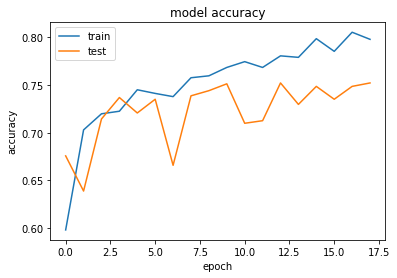

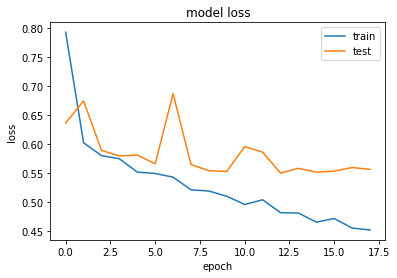

In [13]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

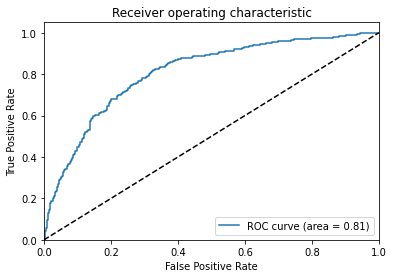

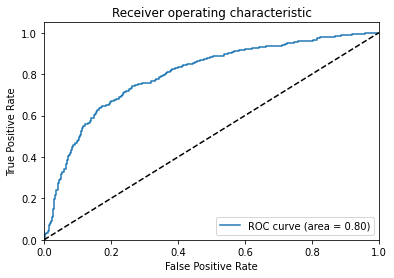

In [14]:
# Compute ROC curve and ROC area for each class

y_score = model2.predict(X_test) # get the prediction probabilities

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
# Plot of a ROC curve for a specific class
for i in range(2):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [15]:
# Model-4
model4 = Sequential() 

model4.add(Conv2D(64,(3,3), activation = 'relu', padding = 'same', input_shape = (50,50,3)))
model4.add(MaxPooling2D(pool_size=(2,2)))
model4.add(Dropout(0.20))
model4.add(Conv2D(128,(3,3), activation = 'relu', padding = 'same'))
model4.add(Dropout(0.25))
model4.add(Conv2D(256,(3,3), activation = 'relu', padding = 'same'))
model4.add(MaxPooling2D(pool_size=(2,2)))
model4.add(Dropout(0.25))
model4.add(Conv2D(512,(3,3), activation = 'relu', padding = 'same'))
model4.add(Dropout(0.25))
model4.add(Conv2D(1024,(3,3), activation = 'relu', padding = 'same'))
model4.add(MaxPooling2D(pool_size=(2,2)))
model4.add(Flatten())
model4.add(Dense(2, activation = 'sigmoid'))


model4.summary()
model4.compile(loss='binary_crossentropy', optimizer ='RMSprop', metrics=['accuracy'])

callback = EarlyStopping(monitor='val_accuracy', patience=5)

seed = 1234
np.random.seed(seed)
history4 = model4.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=50, callbacks=[callback])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 50, 50, 64)        1792      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 25, 25, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 25, 25, 64)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 25, 25, 128)       73856     
                                                                 
 dropout_1 (Dropout)         (None, 25, 25, 128)       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 25, 25, 256)       295168    
                                                      

In [16]:
# Testing the Model On Test Test
preds=model4.predict(X_test)
preds

array([[0.5279223 , 0.46842447],
       [0.48373207, 0.5155185 ],
       [0.508858  , 0.4919692 ],
       ...,
       [0.47942036, 0.51910186],
       [0.4929533 , 0.5081353 ],
       [0.41482687, 0.58875346]], dtype=float32)

In [17]:
y_test_arg=np.argmax(y_test,axis=1)
Y_pred = np.argmax(preds,axis=1)
print(confusion_matrix(y_test_arg, Y_pred)) # Confusion Matrix
print(classification_report(y_test_arg, Y_pred)) # Model Evaluation

[[402 164]
 [131 413]]
              precision    recall  f1-score   support

           0       0.75      0.71      0.73       566
           1       0.72      0.76      0.74       544

    accuracy                           0.73      1110
   macro avg       0.73      0.73      0.73      1110
weighted avg       0.74      0.73      0.73      1110



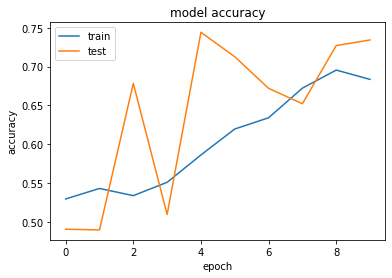

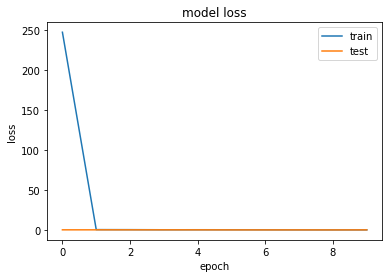

In [18]:
# summarize history for accuracy
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

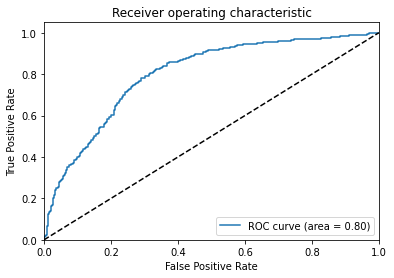

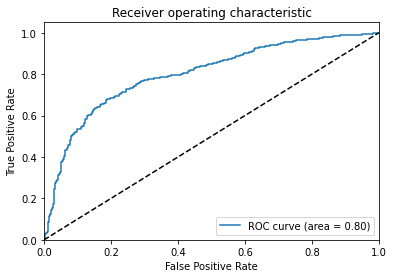

In [19]:
# Compute ROC curve and ROC area for each class

y_score = model4.predict(X_test) # get the prediction probabilities

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
# Plot of a ROC curve for a specific class
for i in range(2):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

Fine-Tuned Models

In [20]:
# Model-5
model5 = Sequential()
model5.add(Conv2D(32,(3,3), activation = 'relu', padding = 'same', input_shape = (50,50,3)))
model5.add(Conv2D(32,(3,3), activation = 'relu', padding = 'same'))
model5.add(MaxPooling2D(pool_size=(2,2)))
model5.add(Dropout(0.25))
model5.add(Conv2D(64,(3,3), activation = 'relu', padding = 'same'))
model5.add(Conv2D(64,(3,3), activation = 'relu', padding = 'same'))
model5.add(MaxPooling2D(pool_size=(2,2)))
model5.add(Dropout(0.25))
model5.add(Flatten())
model5.add(Dense(512, activation = 'relu'))
model5.add(Dropout(0.5))
model5.add(Dense(2, activation = 'softmax'))


model5.compile(optimizer='adam',
             loss= "binary_crossentropy",
             metrics=['accuracy'])
print(model5.summary())

callback = EarlyStopping(monitor='val_accuracy', patience=5)

seed = 1234
np.random.seed(seed)
history5 = model5.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test), verbose = 1, callbacks=[callback])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 50, 50, 32)        896       
                                                                 
 conv2d_12 (Conv2D)          (None, 50, 50, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 25, 25, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 25, 25, 32)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 25, 25, 64)        18496     
                                                                 
 conv2d_14 (Conv2D)          (None, 25, 25, 64)        36928     
                                                      

In [21]:
# test the classifier model:
preds=model5.predict(X_test)
preds

array([[0.8842077 , 0.11579228],
       [0.38649136, 0.61350864],
       [0.95039153, 0.04960851],
       ...,
       [0.21640979, 0.7835902 ],
       [0.13089618, 0.8691038 ],
       [0.06342487, 0.9365752 ]], dtype=float32)

In [22]:
y_test_arg=np.argmax(y_test,axis=1)
Y_pred = np.argmax(preds,axis=1)
print(confusion_matrix(y_test_arg, Y_pred))
print(classification_report(y_test_arg, Y_pred))

[[439 127]
 [133 411]]
              precision    recall  f1-score   support

           0       0.77      0.78      0.77       566
           1       0.76      0.76      0.76       544

    accuracy                           0.77      1110
   macro avg       0.77      0.77      0.77      1110
weighted avg       0.77      0.77      0.77      1110



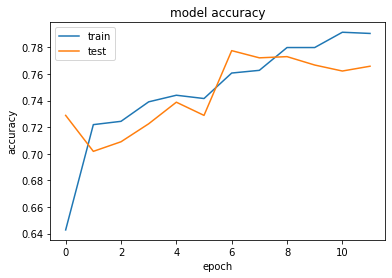

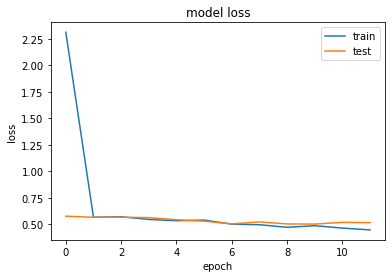

In [23]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history5.history['accuracy'])
plt.plot(history5.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

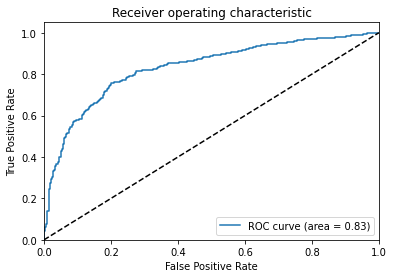

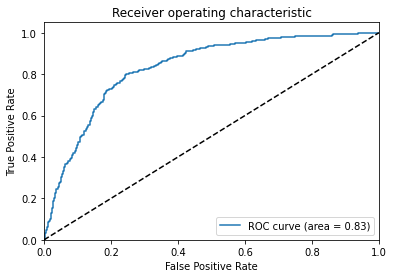

In [24]:
# Compute ROC curve and ROC area for each class

y_score = model5.predict(X_test) # get the prediction probabilities

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
# Plot of a ROC curve for a specific class
for i in range(2):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [25]:
# Model-9
model9 = Sequential() 

model9.add(Conv2D(64,(3,3), activation = 'relu', padding = 'same', input_shape = (50,50,3)))
model9.add(MaxPooling2D(pool_size=(2,2)))
model9.add(Dropout(0.20))
model9.add(Conv2D(128,(3,3), activation = 'relu', padding = 'same'))
model9.add(Dropout(0.25))
model9.add(Conv2D(256,(3,3), activation = 'relu', padding = 'same'))
model9.add(MaxPooling2D(pool_size=(2,2)))
model9.add(Dropout(0.25))
model9.add(Conv2D(512,(3,3), activation = 'relu', padding = 'same'))
model9.add(Dropout(0.25))
model9.add(Conv2D(1024,(3,3), activation = 'relu', padding = 'same'))
model9.add(MaxPooling2D(pool_size=(2,2)))
model9.add(Flatten())
model9.add(Dense(2, activation = 'softmax'))


model9.summary()
model9.compile(loss='binary_crossentropy', optimizer ='RMSprop', metrics=['accuracy'])

callback = EarlyStopping(monitor='val_accuracy', patience=5)

seed = 1234
np.random.seed(seed)
history9 = model9.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=50, callbacks=[callback])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 50, 50, 64)        1792      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 25, 25, 64)       0         
 2D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 25, 25, 64)        0         
                                                                 
 conv2d_16 (Conv2D)          (None, 25, 25, 128)       73856     
                                                                 
 dropout_8 (Dropout)         (None, 25, 25, 128)       0         
                                                                 
 conv2d_17 (Conv2D)          (None, 25, 25, 256)       295168    
                                                      

In [26]:
# test the classifier model:
preds=model9.predict(X_test)
preds

array([[0.95479375, 0.04520618],
       [0.42274937, 0.5772506 ],
       [0.85896313, 0.14103691],
       ...,
       [0.57662225, 0.42337772],
       [0.2898084 , 0.7101916 ],
       [0.0431559 , 0.9568441 ]], dtype=float32)

In [27]:
y_test_arg=np.argmax(y_test,axis=1)
Y_pred = np.argmax(preds,axis=1)
print(confusion_matrix(y_test_arg, Y_pred))
print(classification_report(y_test_arg, Y_pred))

[[449 117]
 [154 390]]
              precision    recall  f1-score   support

           0       0.74      0.79      0.77       566
           1       0.77      0.72      0.74       544

    accuracy                           0.76      1110
   macro avg       0.76      0.76      0.76      1110
weighted avg       0.76      0.76      0.76      1110



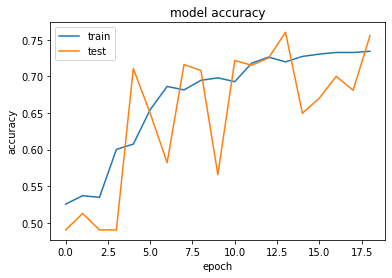

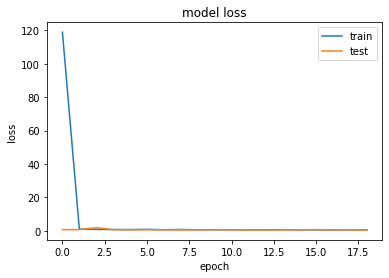

In [28]:
plt.plot(history9.history['accuracy'])
plt.plot(history9.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history9.history['loss'])
plt.plot(history9.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

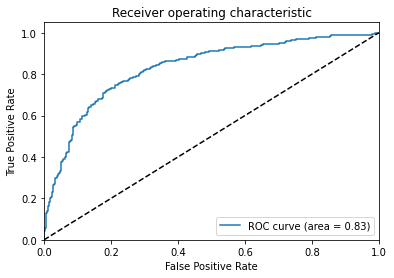

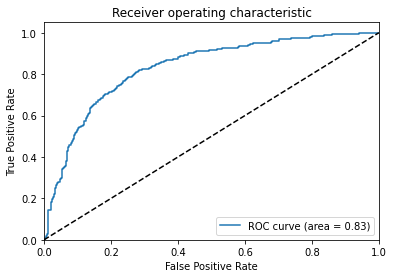

In [29]:
# Compute ROC curve and ROC area for each class

y_score = model9.predict(X_test) # get the prediction probabilities

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
# Plot of a ROC curve for a specific class
for i in range(2):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

Pre-Trained Models

In [30]:
EfficientNetB7=tf.keras.applications.efficientnet.EfficientNetB7(input_shape=(50,50,3),
                                               include_top=False,
                                               weights='imagenet')
mod1=EfficientNetB7.output
mod1=tf.keras.layers.Flatten()(mod1)
mod1=tf.keras.layers.Dense(units=512, activation=tf.nn.relu)(mod1)
output1=tf.keras.layers.Dense(units=2, activation=tf.nn.softmax)(mod1)
model= tf.keras.models.Model(inputs=EfficientNetB7.inputs,outputs=output1)

model.compile(optimizer=tf.keras.optimizers.Adam(0.0005),
             loss=tf.keras.losses.BinaryCrossentropy(from_logits= False),
             metrics=['accuracy'])
model.summary()

callback = EarlyStopping(monitor='val_accuracy', patience=5)

seed = 1234
np.random.seed(seed)
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, callbacks=[callback])

258088960/258076736 [==============================] - 12s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 50, 50, 3)]  0           []                               
                                                                                                  
 rescaling (Rescaling)          (None, 50, 50, 3)    0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 50, 50, 3)    7           ['rescaling[0][0]']              
                                                                                                  
 stem_conv_pad (ZeroPadding2D)  (None, 51, 51, 3)    0           ['normalization[0][0]']          
                          

In [31]:
# test the classifier model:
preds=model.predict(X_test)
preds

array([[0.9972536 , 0.00274642],
       [0.9480436 , 0.0519564 ],
       [0.9698695 , 0.03013047],
       ...,
       [0.00643578, 0.9935642 ],
       [0.37207857, 0.6279214 ],
       [0.01432959, 0.9856704 ]], dtype=float32)

In [32]:
y_test_arg=np.argmax(y_test,axis=1)
Y_pred = np.argmax(preds,axis=1)
print(confusion_matrix(y_test_arg, Y_pred))
print(classification_report(y_test_arg, Y_pred))

[[456 110]
 [142 402]]
              precision    recall  f1-score   support

           0       0.76      0.81      0.78       566
           1       0.79      0.74      0.76       544

    accuracy                           0.77      1110
   macro avg       0.77      0.77      0.77      1110
weighted avg       0.77      0.77      0.77      1110



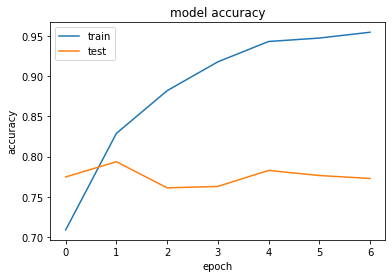

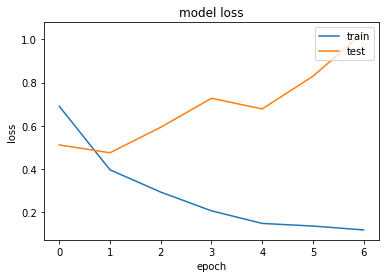

In [33]:
# summarize history for accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [34]:
RestNet50=tf.keras.applications.resnet.ResNet50(input_shape=(50,50,3),
                                               include_top=False,
                                               weights='imagenet')
mod1=RestNet50.output
mod1=tf.keras.layers.Flatten()(mod1)
mod1=tf.keras.layers.Dense(units=256, activation=tf.nn.relu)(mod1)
output1=tf.keras.layers.Dense(units=2, activation=tf.nn.sigmoid)(mod1)
model10= tf.keras.models.Model(inputs=RestNet50.inputs,outputs=output1)

model10.compile(optimizer=tf.keras.optimizers.Adam(0.001),
             loss=tf.keras.losses.BinaryCrossentropy(from_logits= False),
             metrics=['accuracy'])
model10.summary()

callback = EarlyStopping(monitor='val_accuracy', patience=5)

seed = 1234
np.random.seed(seed)
hist10 = model10.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, callbacks=[callback])


94781440/94765736 [==============================] - 3s 0us/step
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 50, 50, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 56, 56, 3)    0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 25, 25, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 25, 25, 64)   256         ['conv1_conv[0][0]']             
                           

In [35]:
# test the classifier model:
preds=model10.predict(X_test)
preds

array([[0.88186866, 0.11556469],
       [0.5099845 , 0.48854586],
       [0.5099845 , 0.48854586],
       ...,
       [0.77551043, 0.23601581],
       [0.8815755 , 0.11258931],
       [0.4585002 , 0.5444975 ]], dtype=float32)

In [36]:
y_test_arg=np.argmax(y_test,axis=1)
Y_pred = np.argmax(preds,axis=1)
print(confusion_matrix(y_test_arg, Y_pred))
print(classification_report(y_test_arg, Y_pred))

[[540  26]
 [404 140]]
              precision    recall  f1-score   support

           0       0.57      0.95      0.72       566
           1       0.84      0.26      0.39       544

    accuracy                           0.61      1110
   macro avg       0.71      0.61      0.55      1110
weighted avg       0.71      0.61      0.56      1110



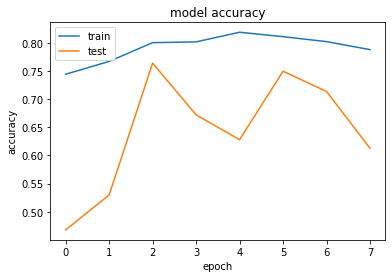

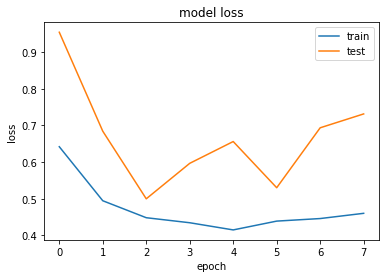

In [37]:
plt.plot(hist10.history['accuracy'])
plt.plot(hist10.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(hist10.history['loss'])
plt.plot(hist10.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()